# Before you begin

## Update your course repository

You need to clone the course repository to Nova. You probably already have cloned this, so you can skip this step.

```bash
git clone git@github.com:EEOB-BioData/BCB546_Spring2025.git
```



You will still need to pull new changes to this repository at the beginning of class. This will enable you to access new data files and scripts needed for in-class activities.

```bash
cd BCB546_Spring2025
git pull
```



Note that if you have modified any files in the repository, you will need to commit those changes before you can pull new changes. If you don't care about the changes, just delete and re-clone the repository.

## Start Jupyter notebook on Nova on demand.

You can start Jupyter notebook on Nova on demand. This will allow you to run Jupyter notebook on the server and access it from your local machine.

1. Go to the [Nova OnDemand](https://nova-ondemand.its.iastate.edu/) and login
2. Under the "Interactive Apps" tab, click on "Jupyter Notebook", request desired resources and click "Launch"
3. Wait for the job to start and click on the "Connect to Jupyter" button


# Getting Started

To being with, we will need to load the `pandas` library. This library will provide us with the tools we need to work with dataframes.

Advantages include:

1. Easy data Handling
2. Can handle large datasets
3. Supports multiple file formats
4. Integrates with many other packages, e.g., Numpy, Matplotlib, SciPy

## Pandas has two main data structures:

Series: 1-dimensional array-like object. The series is indexed by an associated array of standard or custom labels (think names)

Series Creation: `pd.Series(data, index=index)`

DataFrame Creation: `pd.DataFrame(data, index=index, columns=columns)`

In [1]:
import pandas as pd

Often times, we will also need other libraries to help us with our data analysis. For example, we may need to use the `numpy` library when working with arrays or `os` module when working with files. We can import these libraries as follows:

In [2]:
import numpy as np
import os

With `os` module you can get the current working directory using the following command:

In [3]:
os.getcwd()

'/ptmp/LAS/jfw-lab/corrinne/temp'

This will return the current working directory as a string. `os` also allows you to construct bash commands and execute them using `os.system()`. For example, to list the files in the current working directory, you can use the following command:


In [4]:
os.system('ls')

01-introduction-to-pandas.ipynb
BCB546_Spring2024
blast_output.xml
data.csv
DESeq2results-KOvsWT.tsv
fibo.py
gc_percent.ipynb
newdir
Penguins Assignment.ipynb
penguins_cytb.fasta
penguins_mass.csv
README.md
sequence_translate.py
species.csv
surveys_complete.csv
surveys.csv
tb1_zm_aligned.fasta
tb1_zm.fasta
Untitled1.ipynb
Untitled.ipynb


0

or

In [5]:
cmd = 'ls' # you can construct more complex commands this way
os.system(cmd)

01-introduction-to-pandas.ipynb
BCB546_Spring2024
blast_output.xml
data.csv
DESeq2results-KOvsWT.tsv
fibo.py
gc_percent.ipynb
newdir
Penguins Assignment.ipynb
penguins_cytb.fasta
penguins_mass.csv
README.md
sequence_translate.py
species.csv
surveys_complete.csv
surveys.csv
tb1_zm_aligned.fasta
tb1_zm.fasta
Untitled1.ipynb
Untitled.ipynb


0

There are other ways to run bash commands as well (magic commands, or with `!`), but `os` is a good way to do it programmatically and is easier to use when you need to construct more complex commands.


# Data Structures

The primary data structure in `pandas` is the `DataFrame`. This is a two-dimensional table with rows and columns. You can create a `DataFrame` from a dictionary, a list of dictionaries, a list of lists, or a numpy array.


In [6]:
# Create a DataFrame from a dictionary
data = {'name': ['John', 'Anna', 'Peter', 'Linda'],
        'age': [23, 36, 32, 45],
        'city': ['New York', 'Paris', 'Berlin', 'London']}
df = pd.DataFrame(data)
print(df)

    name  age      city
0   John   23  New York
1   Anna   36     Paris
2  Peter   32    Berlin
3  Linda   45    London


You can also create a `DataFrame` from a list of dictionaries. This is useful when you have data that is not in a tabular format.

In [7]:
data = [{'name': 'John', 'age': 23, 'city': 'New York'},
        {'name': 'Anna', 'age': 36, 'city': 'Paris'},
        {'name': 'Peter', 'age': 32, 'city': 'Berlin'},
        {'name': 'Linda', 'age': 45, 'city': 'London'}]
df = pd.DataFrame(data)
print(df)

    name  age      city
0   John   23  New York
1   Anna   36     Paris
2  Peter   32    Berlin
3  Linda   45    London


# Our data

For this lesson, we will be using the Portal Teaching data, a subset of the data from the ecological study by Ernst et al. (2009): [Long-term monitoring and experimental manipulation of a Chihuahuan Desert ecosystem near Portal](http://www.esapubs.org/archive/ecol/E090/118/default.htm), Arizona, USA Specifically, we will be using files from the [Portal Project Teaching Database](https://figshare.com/articles/Portal_Project_Teaching_Database/1314459).

This section will use the surveys.csv file that can be downloaded from the `course-files/python` folder of the course repository. Pull from the course repository and change to to course-files/python or copy the surveys.csv file to the directory from which you would like to work.

In this lesson, we are studying the species and weight of (vertebrate) animals captured in plots in our study area. The observed data are stored as a `.csv` file (comma-separated value): each row holds information for a single animal, and the columns represent:



## Reading data

To read the data from the `surveys.csv` file, we can use the `read_csv` function from `pandas`.


In [3]:
surveys = pd.read_csv('surveys.csv')

You can view the contents of the dataframe

In [66]:
print(surveys) # or just type the variable name `surveys`

       record_id  month  day  year  plot_id species_id  sex  hindfoot_length  \
0              1      7   16  1977        2         NL    M             32.0   
1              2      7   16  1977        3         NL    M             33.0   
2              3      7   16  1977        2         DM    F             37.0   
3              4      7   16  1977        7         DM    M             36.0   
4              5      7   16  1977        3         DM    M             35.0   
...          ...    ...  ...   ...      ...        ...  ...              ...   
35544      35545     12   31  2002       15         AH  NaN              NaN   
35545      35546     12   31  2002       15         AH  NaN              NaN   
35546      35547     12   31  2002       10         RM    F             15.0   
35547      35548     12   31  2002        7         DO    M             36.0   
35548      35549     12   31  2002        5        NaN  NaN              NaN   

       weight  weight_kg  
0         Na

## Basic information about the data

To get basic information about the data, you can use the `info()` method.


In [10]:
surveys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35549 entries, 0 to 35548
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_id        35549 non-null  int64  
 1   month            35549 non-null  int64  
 2   day              35549 non-null  int64  
 3   year             35549 non-null  int64  
 4   plot_id          35549 non-null  int64  
 5   species_id       34786 non-null  object 
 6   sex              33038 non-null  object 
 7   hindfoot_length  31438 non-null  float64
 8   weight           32283 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 2.4+ MB


This will return the number of rows and columns, the column names, the number of non-null values in each column, and the data type of each column.


We can also use `type`, `dtypes` and `shape` to get information about the data.

In [11]:
type(surveys)

pandas.core.frame.DataFrame

In [12]:
surveys.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

In [13]:
surveys.shape

(35549, 9)

To look at just the columns of a DataFrame, you can use the `columns` attribute.

In [14]:
surveys.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

similiarly, you can look at the index of the DataFrame using the `index` attribute.

In [15]:
surveys.index

RangeIndex(start=0, stop=35549, step=1)

other useful options include `head()` and `tail()` methods to view the first and last few rows of the DataFrame.

In [16]:
surveys.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [17]:
surveys.tail()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


## Selecting data

You can select data from a DataFrame using the `iloc` method. This method allows you to select rows and columns by their integer index.

Select first row


In [18]:
surveys.iloc[0]

record_id             1
month                 7
day                  16
year               1977
plot_id               2
species_id           NL
sex                   M
hindfoot_length    32.0
weight              NaN
Name: 0, dtype: object

We can also select the first 5 rows (note that `.iloc` is *exclusive* meaning that the end of the range is not included)

In [19]:
surveys.iloc[0:5]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


We can also select the first 5 rows and the first 3 columns

In [20]:
surveys.iloc[0:5, 0:3]

,record_id,month,day
0,1,7,16
1,2,7,16
2,3,7,16
3,4,7,16
4,5,7,16


We can also select data using the column names. This can be done using the `loc` method.

In [21]:
surveys.loc[0:5, ['species_id', 'record_id', 'hindfoot_length']]

,species_id,record_id,hindfoot_length
0,NL,1,32.0
1,NL,2,33.0
2,DM,3,37.0
3,DM,4,36.0
4,DM,5,35.0
5,PF,6,14.0


We can also select data based on conditions. For example, to select all rows where the `species_id` is equal to `NL`, you can use the following command:

In [22]:
surveys[surveys['species_id'] == 'NL']

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
21,22,7,17,1977,15,NL,F,31.0,NaN
37,38,7,17,1977,17,NL,M,33.0,NaN
71,72,8,19,1977,2,NL,M,31.0,NaN
...,...,...,...,...,...,...,...,...,...
35403,35404,12,29,2002,2,NL,F,30.0,NaN
35414,35415,12,29,2002,12,NL,F,33.0,200.0
35434,35435,12,29,2002,18,NL,F,31.0,150.0
35458,35459,12,29,2002,20,NL,F,29.0,148.0


This can also be done using `.query`

In [23]:
surveys.query('weight > 200')

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
587,588,2,18,1978,2,NL,M,NaN,218.0
645,646,2,20,1978,18,NL,M,32.0,228.0
654,655,3,11,1978,3,NL,M,32.0,232.0
824,825,4,10,1978,18,NL,M,NaN,225.0
844,845,5,6,1978,2,NL,M,32.0,204.0
...,...,...,...,...,...,...,...,...,...
34990,34991,11,9,2002,2,NL,M,33.0,238.0
35211,35212,12,7,2002,2,NL,M,33.0,248.0
35248,35249,12,7,2002,12,NL,F,33.0,212.0
35283,35284,12,7,2002,24,NL,M,35.0,225.0


We can combine conditions using `&` (and) and `|` (or) for more complicated filtering. For example, to select all rows where the `species_id` is equal to `NL` and the `sex` is equal to `M`, you can use the following command:

In [4]:
surveys[(surveys['species_id'] == 'NL') & (surveys['sex'] == 'M')]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
37,38,7,17,1977,17,NL,M,33.0,NaN
71,72,8,19,1977,2,NL,M,31.0,NaN
587,588,2,18,1978,2,NL,M,NaN,218.0
...,...,...,...,...,...,...,...,...,...
34863,34864,10,5,2002,24,NL,M,28.0,194.0
34990,34991,11,9,2002,2,NL,M,33.0,238.0
35211,35212,12,7,2002,2,NL,M,33.0,248.0
35283,35284,12,7,2002,24,NL,M,35.0,225.0


Again, we can use query, but now with the words "and" or "or"

In [25]:
surveys.query('month==12 or month==7')

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


We can also select columns based on type. Here we will select only numeric columns.

In [26]:
surveys.select_dtypes(include='number')

,record_id,month,day,year,plot_id,hindfoot_length,weight
0,1,7,16,1977,2,32.0,NaN
1,2,7,16,1977,3,33.0,NaN
2,3,7,16,1977,2,37.0,NaN
3,4,7,16,1977,7,36.0,NaN
4,5,7,16,1977,3,35.0,NaN
...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,NaN,NaN
35545,35546,12,31,2002,15,NaN,NaN
35546,35547,12,31,2002,10,15.0,14.0
35547,35548,12,31,2002,7,36.0,51.0


We can also get a list of all the species in the dataset. The pd.unique method tells us all of the unique values in the `species_id` column. In this data, these are two-character identifiers representative of the species names (e.g., NL represents the rodent _Neotoma albigula_).

In [27]:
pd.unique(surveys['species_id'])

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

# Practice questions:

1. Select unique `plot_id` values.
2. Select all rows where the `weight` is greater than 50.
3. Select all rows where the `weight` is greater than 50 and the `species_id` is equal to `NL`.
4. `nunique()` is a useful method to get the number of unique values in a column. Use this method to get the number of unique `species_id` values.


# Groups in pandas

Grouping allows you to split your data into subsets based on unique values in a column. We often want to calculate summary statistics on these groups. For example, we might want to calculate the average weight of all individuals per plot. If we group by plot, we can then perform operations (e.g., counting, summing, averaging) on each group.


Columns are an existing group. We can calculate basic statistics for all records in a single column using the .describe() method:

In [28]:
surveys['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

We can also do it for the whole dataframe, but it will only work on numeric columns

In [29]:
surveys.describe()

,record_id,month,day,year,plot_id,hindfoot_length,weight
count,35549.000000,35549.000000,35549.000000,35549.000000,35549.000000,31438.000000,32283.000000
mean,17775.000000,6.474022,16.105966,1990.475231,11.397001,29.287932,42.672428
std,10262.256696,3.396583,8.256691,7.493355,6.799406,9.564759,36.631259
min,1.000000,1.000000,1.000000,1977.000000,1.000000,2.000000,4.000000
25%,8888.000000,4.000000,9.000000,1984.000000,5.000000,21.000000,20.000000
50%,17775.000000,6.000000,16.000000,1990.000000,11.000000,32.000000,37.000000
75%,26662.000000,9.000000,23.000000,1997.000000,17.000000,36.000000,48.000000
max,35549.000000,12.000000,31.000000,2002.000000,24.000000,70.000000,280.000000


We can also calculate just one of the statistics by using `.median`, `.min`, `.max`, `.count`, `.nunique`, `.var`, `.std`, `.sum`,`.sem`, `.skew`, `.kurt`, `.quantile`, `.cumsum`, `.cumprod`, `.cummax`, `.cummin`, etc. We can even easily estimate the correlation between (numeric) columns with `.corr`. Be aware that some operations only work on numeric columns, so if we have mixed data, we have to tell pandas to only consider numeric columns. Here are a few examples (you can try the rest yourselves).

In [30]:
surveys.median(numeric_only=True)

record_id          17775.0
month                  6.0
day                   16.0
year                1990.0
plot_id               11.0
hindfoot_length       32.0
weight                37.0
dtype: float64

In [31]:
surveys.nunique()

record_id          35549
month                 12
day                   31
year                  26
plot_id               24
species_id            48
sex                    2
hindfoot_length       56
weight               255
dtype: int64

In [32]:
surveys.corr(numeric_only=True)

,record_id,month,day,year,plot_id,hindfoot_length,weight
record_id,1.000000,0.073746,0.017181,0.997570,-0.004048,-0.285324,-0.273123
month,0.073746,1.000000,0.011461,0.031071,0.020908,-0.013346,-0.002618
day,0.017181,0.011461,1.000000,0.018490,0.020142,-0.006067,-0.013013
year,0.997570,0.031071,0.018490,1.000000,-0.004230,-0.287259,-0.276595
plot_id,-0.004048,0.020908,0.020142,-0.004230,1.000000,-0.126284,-0.061435
hindfoot_length,-0.285324,-0.013346,-0.006067,-0.287259,-0.126284,1.000000,0.683813
weight,-0.273123,-0.002618,-0.013013,-0.276595,-0.061435,0.683813,1.000000


These examples were for entire columns. What if we do want to calculate statistics based on some grouping? We can first group by that column (here, plot) and then extract one (or more) columns (here, weight) from the DataFrame before calculating a statistic for that extracted column(s) by group. In our example, we will calculate the mean weight per plot.


In [33]:
surveys.groupby('plot_id')['weight'].mean().head(10)

plot_id
1     51.822911
2     52.251688
3     32.654386
4     47.928189
5     40.947802
6     36.738893
7     20.663009
8     47.758001
9     51.432358
10    18.541219
Name: weight, dtype: float64

Aggregation allows you to compute summary statistics (e.g., sum, mean, max) for one or more columns across the entire dataset or within groups. Here we will groupby plot, and then calculate the mean, median, and standard deviation for weight. 

Generically, aggregation is specified by `df.agg({'age': 'sum', 'weight': 'mean'})` for ungrouped data and `df.groupby('column_name').agg({'column_to_aggregate': 'agg_function'})` for grouped data.

In [34]:
surveys.groupby('plot_id')['weight'].agg(['mean', 'median', 'std']).head(10)

,mean,median,std
plot_id,,,
1,51.822911,44.0,38.176670
2,52.251688,41.0,46.503602
3,32.654386,23.0,35.641630
4,47.928189,43.0,32.886598
5,40.947802,37.0,34.086616
6,36.738893,30.0,30.648310
7,20.663009,17.0,21.315325
8,47.758001,44.0,33.192194
9,51.432358,45.0,33.724726


You can also group by multiple columns.


In [35]:
surveys.groupby(['species_id', 'sex'])['weight'].mean().head(10)

species_id  sex
AH          M             NaN
BA          F        9.161290
            M        7.357143
DM          F       41.609685
            M       44.353134
DO          F       48.531250
            M       49.135102
DS          F      117.749548
            M      122.290984
NL          F      154.282209
Name: weight, dtype: float64


# Practice questions:

1. Using the .describe() method on the DataFrame sorted by sex, determine how many individuals were observed for each.
2. Use `groupby` method to group 2 columns `['plot_id','sex']` and calculate the mean of the `weight` column.


# Column operations


We can also add or remove columns from our dataframe. For example, to add a new column `weight_kg` that contains the weight in kilograms, you can use the following command:


In [36]:
surveys['weight_kg'] = surveys['weight'] / 1000

In [37]:
surveys.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,weight_kg
0,1,7,16,1977,2,NL,M,32.0,NaN,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN,NaN


We see a lot of NaN at the head of this file. If we want to know whether there are actual values in the column, we can describe it

In [38]:
surveys['weight_kg'].describe()

count    32283.000000
mean         0.042672
std          0.036631
min          0.004000
25%          0.020000
50%          0.037000
75%          0.048000
max          0.280000
Name: weight_kg, dtype: float64

If we want to remove both weight columns, we can.

In [39]:
surveys.drop(columns=['weight','weight_kg']).head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length
0,1,7,16,1977,2,NL,M,32.0
1,2,7,16,1977,3,NL,M,33.0
2,3,7,16,1977,2,DM,F,37.0
3,4,7,16,1977,7,DM,M,36.0
4,5,7,16,1977,3,DM,M,35.0



# Practice questions:

1. Add a new column `hindfoot_cm` that contains the hindfoot length in centimeters.
2. Calculate the mean of the `hindfoot_cm` column grouped by `species_id` and `sex`.


# Missing data

To check for missing data, you can use the `.isnull()` or `.isna()` method. They both will return the same thing.

In [42]:
surveys.isnull()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,weight_kg
0,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...
35544,False,False,False,False,False,False,True,True,True,True
35545,False,False,False,False,False,False,True,True,True,True
35546,False,False,False,False,False,False,False,False,False,False
35547,False,False,False,False,False,False,False,False,False,False


We might want to know how many values are missing in each column. In this case, we can use `.isnull()` followed by `.sum()` method. (Remember, to a computer, True=1 and False=0). So, for each column we will count up how many "True" values there are (i.e., how many missing values there are).


In [43]:
surveys.isnull().sum()

record_id             0
month                 0
day                   0
year                  0
plot_id               0
species_id          763
sex                2511
hindfoot_length    4111
weight             3266
weight_kg          3266
dtype: int64

Incomplete observations might not be useful to us. In that case, we can drop rows with missing data using `.dropna()`.

In [44]:
surveys.dropna()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,weight_kg
62,63,8,19,1977,3,DM,M,35.0,40.0,0.040
63,64,8,19,1977,7,DM,M,37.0,48.0,0.048
64,65,8,19,1977,4,DM,F,34.0,29.0,0.029
65,66,8,19,1977,4,DM,F,35.0,46.0,0.046
66,67,8,19,1977,7,DM,M,35.0,36.0,0.036
...,...,...,...,...,...,...,...,...,...,...
35540,35541,12,31,2002,15,PB,F,24.0,31.0,0.031
35541,35542,12,31,2002,15,PB,F,26.0,29.0,0.029
35542,35543,12,31,2002,15,PB,F,27.0,34.0,0.034
35546,35547,12,31,2002,10,RM,F,15.0,14.0,0.014


Let's see what that did to our records. We can count before and after dropping missing values.

In [45]:
surveys.count()

record_id          35549
month              35549
day                35549
year               35549
plot_id            35549
species_id         34786
sex                33038
hindfoot_length    31438
weight             32283
weight_kg          32283
dtype: int64

In [46]:
surveys.dropna().count()

record_id          30676
month              30676
day                30676
year               30676
plot_id            30676
species_id         30676
sex                30676
hindfoot_length    30676
weight             30676
weight_kg          30676
dtype: int64

Instead of dropping the data, we might want to fill missing data with a specific value. We can use `.fillna()` to do this.

In [47]:
surveys.fillna(0)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,weight_kg
0,1,7,16,1977,2,NL,M,32.0,0.0,0.000
1,2,7,16,1977,3,NL,M,33.0,0.0,0.000
2,3,7,16,1977,2,DM,F,37.0,0.0,0.000
3,4,7,16,1977,7,DM,M,36.0,0.0,0.000
4,5,7,16,1977,3,DM,M,35.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,0,0.0,0.0,0.000
35545,35546,12,31,2002,15,AH,0,0.0,0.0,0.000
35546,35547,12,31,2002,10,RM,F,15.0,14.0,0.014
35547,35548,12,31,2002,7,DO,M,36.0,51.0,0.051


The way we just did it filled all missing data with zero. But what if we want to do it for just one column? In that case, we would want to `.fillna()` for just that column. Remember, though, that you have to reassign it if you change it. Otherwise, you are just viewing the changes! Here we will just view the changes, but if you want to save it, you will use something like `df['columnA'] = df['columnA'].fillna("value")`

In [48]:
surveys['weight_kg'].fillna(0)

0        0.000
1        0.000
2        0.000
3        0.000
4        0.000
         ...  
35544    0.000
35545    0.000
35546    0.014
35547    0.051
35548    0.000
Name: weight_kg, Length: 35549, dtype: float64


# Practice questions:

1. Drop all rows with missing data and save the result to a new DataFrame.


# Exporting data

After we have cleaned up our data, we might want to export it. Pandas has a lot of methods to export. The most basic is `to_csv()`, which will generate a Comma Separated File. As in R, you can change the separator with `sep=`. You will also note that we include `index=False`. This is similar to `row.names=F` in R (don't write the index, or the row names).

In [49]:
surveys.to_csv('surveys_clean.csv', index=False)

This will save the DataFrame to a file called `surveys_clean.csv` without the index column.

# Plotting

Pandas can do basic plotting. This plotting is built on MatPlotLib, which we will go over later. For quick and dirty plots, we can use `plot()`. A basic plot might be a scatterplot between hindfoot_length and weight.

<Axes: xlabel='hindfoot_length', ylabel='weight'>

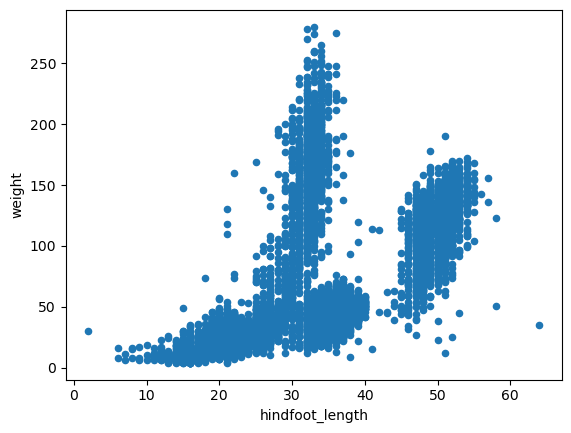

In [50]:
surveys.plot(kind='scatter', x='hindfoot_length', y='weight')

Here are some other quick and dirty plots of different types.

<Axes: xlabel='hindfoot_length'>

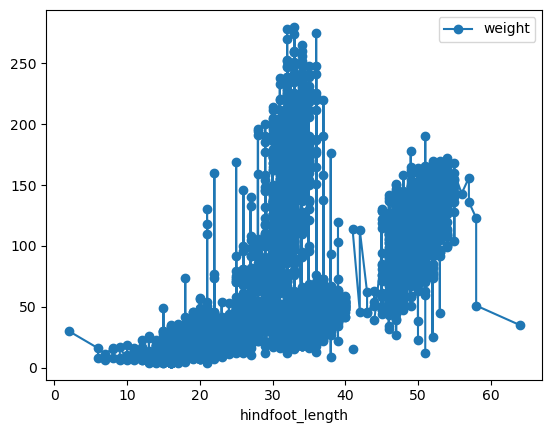

In [51]:
surveys.sort_values(by='hindfoot_length').plot(kind='line', x='hindfoot_length', y='weight', marker='o')

<Axes: xlabel='species_id'>

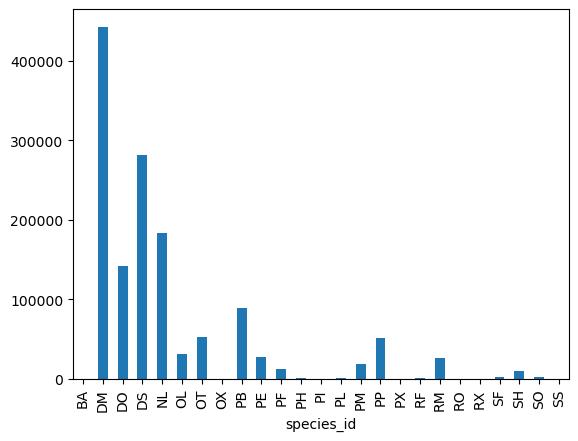

In [52]:
surveys.dropna(subset=['weight']).groupby('species_id')['weight'].sum().plot(kind='bar')


But perhaps we want to get more complicated and use groups in our plots. Here lets find the mean weight for each plot divided by sex.

In [55]:
by_plot_sex = surveys.groupby(['plot_id','sex'])
plot_data = by_plot_sex['weight'].mean()
plot_data.head(10)

plot_id  sex
1        F      46.311138
         M      55.950560
2        F      52.561845
         M      51.391382
3        F      31.215349
         M      34.163241
4        F      46.818824
         M      48.888119
5        F      40.974806
         M      40.708551
Name: weight, dtype: float64

We can also graph the sums of weights for each sex within each plot. Here we will take the new table that we generate (`plot_data`) and make a barplot. Because the data are already grouped within the table, it will keep them grouped in the plot.

<Axes: xlabel='plot_id,sex'>

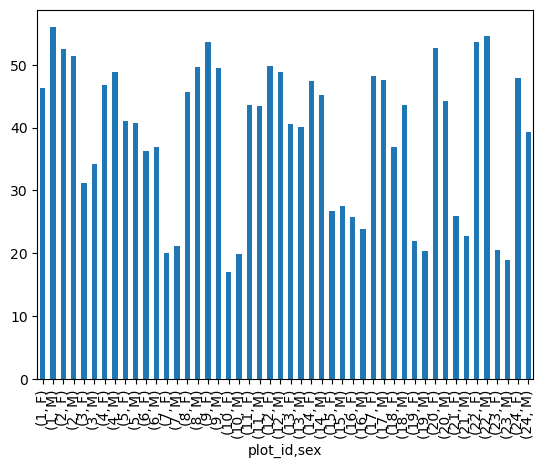

In [56]:
plot_data.plot(kind='bar')

The table that was output is *stacked*. In Python, we can convert between long and wide data by stacking it or unstacking. This is particularly useful for hierarchical data. 

* `.stack()`  : Moves columns into the row index (wide → long).
* `.unstack()`: Moves index levels back into columns (long → wide).

We can use `.unstack` to reshape the data to separate the `M` and `F` values into separate columns.

In [57]:
plot_data_unstacked = plot_data.unstack()
plot_data_unstacked.head()

sex,F,M
plot_id,,
1,46.311138,55.950560
2,52.561845,51.391382
3,31.215349,34.163241
4,46.818824,48.888119
5,40.974806,40.708551


Now when we plot the data, we will get a similar plot, but now the data will plot by column.

<Axes: xlabel='plot_id'>

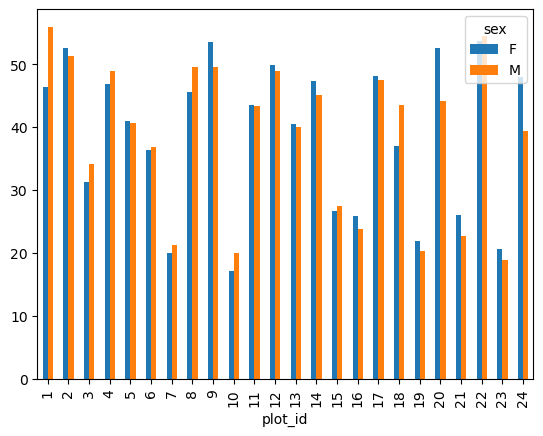

In [58]:
plot_data_unstacked.plot(kind='bar')

Even using the basic plotting functions in Pandas, we can refine the plot a little bit more.

Text(0.5, 1.0, 'Mean weight by plot')

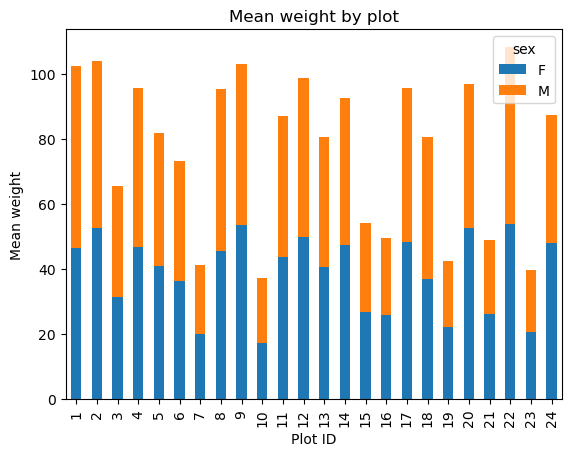

In [60]:
stkplot = plot_data_unstacked.plot(kind='bar', stacked=True)
stkplot.set_ylabel("Mean weight")
stkplot.set_xlabel("Plot ID")
stkplot.set_title("Mean weight by plot")

So what does stacking data look like? Remember, `.stack()`  : Moves columns into the row index (wide → long). First let's construct a simple dataframe.

In [61]:
gene = pd.DataFrame({
    'Gene': ['Gene1', 'Gene2'],
    'Tissue_A': [5, 8],
    'Tissue_B': [7, 6]
})
gene

,Gene,Tissue_A,Tissue_B
0,Gene1,5,7
1,Gene2,8,6


Now we can stack it.

In [62]:
gene.stack()

0  Gene        Gene1
   Tissue_A        5
   Tissue_B        7
1  Gene        Gene2
   Tissue_A        8
   Tissue_B        6
dtype: object

What do we notice here? The dataframe is stacked by index. This may not be helpful to us. We can set the index inline to tell Pandas how to stack the dataframe.

In [63]:
gene.set_index('Gene').stack()

Gene           
Gene1  Tissue_A    5
       Tissue_B    7
Gene2  Tissue_A    8
       Tissue_B    6
dtype: int64

Sometimes, however, we don't need to stack our data. We just need to .`melt()` it (usually for visualization). This also converts wide data to long data, but without adding hierarchy.

In [64]:
melted = gene.melt(id_vars=["Gene"], var_name="Tissue", value_name="Expression")
melted

,Gene,Tissue,Expression
0,Gene1,Tissue_A,5
1,Gene2,Tissue_A,8
2,Gene1,Tissue_B,7
3,Gene2,Tissue_B,6


If we need this reconstructed to the original dataset, we can use `.pivot()`. This takes long data and attempts to arrange it into a table.

In [65]:
melted.pivot(index="Gene", columns="Tissue", values="Expression").reset_index()

Tissue,Gene,Tissue_A,Tissue_B
0,Gene1,5,7
1,Gene2,8,6


# Practice take home questions (not graded):

Continue working with the surveys_df DataFrame on the following challenges:

1. Plot the average weight over all species and plots sampled each year (i.e., year on the horizontal axis and average weight on the vertical axis).

2. Come up with another way to view and/or summarize the observations in this dataset. What do you learn from this?

Feel free to use the `#scripting_help` channel in Slack to discuss these exercises.